#### Librerias:

In [1071]:
import numpy as np
from pyswarm import pso
import math
import matplotlib.pyplot as plt

#### Función a maximizar:

radianes = grados * pi / 180

In [1072]:
# funcion objetivo
def funcion_objetivo(x):
    
    return np.sin(x) + np.sin(x**2)

#### Parametros algoritmo:

In [1073]:
# parametros
num_particulas = 2  # numero de particulas
dim = 1  # dimensiones
cantidad_iteraciones = 30  # maximo numero de iteraciones
c1 = 1.49  # componente cognitivo
c2 = 1.49  # componente social
w = 0.5  # factor de inercia
limite_inf = 0 # limite inferior de busqueda
limite_sup = 10 # limite superior de busqueda

#### Inicizalizaciones:

In [1074]:
# inicializacion
particulas = np.random.uniform(limite_inf, limite_sup, (num_particulas, dim))  # posiciones iniciales de las particulas

velocidades = np.zeros((num_particulas, dim))  # inicializacion de la matriz de velocidades en cero

# inicializacion de pbest y gbest
pbest = particulas.copy()  # mejores posiciones personales iniciales

fitness_pbest = np.empty(num_particulas)  # mejores fitness personales iniciales
for i in range(num_particulas):
    fitness_pbest[i] = funcion_objetivo(particulas[i][0])

# cambiando por np.argmin y por np.min creo que tenemos un problema de minimización
gbest = pbest[np.argmax(fitness_pbest)]  # mejor posicion global inicial
fitness_gbest = np.max(fitness_pbest)  # fitness global inicial

#### Realizamos la busqueda, aplicamos el algoritmo PSO:

In [1075]:
# busqueda
for iteracion in range(cantidad_iteraciones):
    for i in range(num_particulas):  # iteracion sobre cada partícula
        r1, r2 = np.random.rand(), np.random.rand()  # generacion dos numeros aleatorios

        # actualizacion de la velocidad de la particula en cada dimension
        velocidades[i] = (w * velocidades[i] + c1 * r1 * (pbest[i] - particulas[i]) + c2 * r2 * (gbest - particulas[i]))

        particulas[i] = particulas[i] + velocidades[i]  # actualizacion de la posicion de la particula

        # mantenimiento de las partículas dentro de los limites
        particulas[i] = np.clip(particulas[i], limite_inf, limite_sup)

        fitness = funcion_objetivo(particulas[i][0])  # Evaluacion de la funcion objetivo para la nueva posicion

        # actualizacion el mejor personal
        if fitness > fitness_pbest[i]: # cambiar el simbolo a <, hace que sea minimización
            fitness_pbest[i] = fitness  # actualizacion del mejor fitness personal
            pbest[i] = particulas[i].copy()  # actualizacion de la mejor posicion personal

            # actualizacion del mejor global
            if fitness > fitness_gbest: # cambiar el simbolo a <, hace que sea minimización
                fitness_gbest = fitness  # actualizacion del mejor fitness global
                gbest = particulas[i].copy()  # actualizacion de la mejor posicion global

    # imprimir el mejor global en cada iteracion
    print(f"Iteración {iteracion + 1}: Mejor posición global {gbest}, Valor {fitness_gbest}")

Iteración 1: Mejor posición global [7.61317997], Valor 1.9585403628917621
Iteración 2: Mejor posición global [7.61317997], Valor 1.9585403628917621
Iteración 3: Mejor posición global [7.61317997], Valor 1.9585403628917621
Iteración 4: Mejor posición global [7.61317997], Valor 1.9585403628917621
Iteración 5: Mejor posición global [7.61317997], Valor 1.9585403628917621
Iteración 6: Mejor posición global [7.61317997], Valor 1.9585403628917621
Iteración 7: Mejor posición global [7.61317997], Valor 1.9585403628917621
Iteración 8: Mejor posición global [7.61317997], Valor 1.9585403628917621
Iteración 9: Mejor posición global [7.61317997], Valor 1.9585403628917621
Iteración 10: Mejor posición global [7.61317997], Valor 1.9585403628917621
Iteración 11: Mejor posición global [7.61317997], Valor 1.9585403628917621
Iteración 12: Mejor posición global [7.61317997], Valor 1.9585403628917621
Iteración 13: Mejor posición global [7.61317997], Valor 1.9585403628917621
Iteración 14: Mejor posición globa

In [1076]:
# resultado
solucion_optima = gbest  # mejor posicion global final
valor_optimo = fitness_gbest  # mejor fitness global final

print("Valor optimo:", valor_optimo)
print("La solucion optima ocurre en x = ", solucion_optima)

Valor optimo: 1.9736937770729872
La solucion optima ocurre en x =  [7.62459276]


El valor maximo verdadero es:  
Valor optimo 1.9736937778255257   
Ocurre en x = 7.624590400395823   
Lo calcule con una pagina web, solo lo uso para comparar con lo que obtengo.

#### Punto c: grafico.

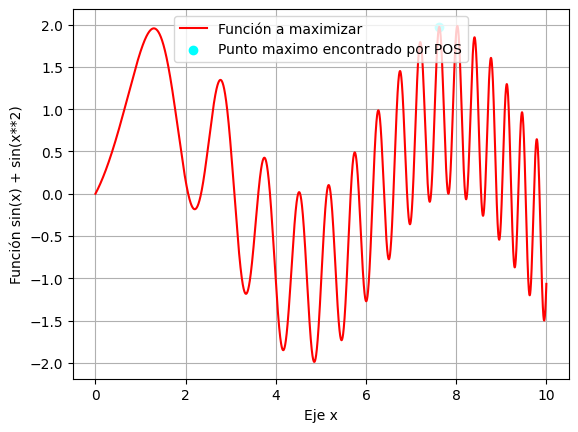

In [1077]:
# puntos para sacar muestras
samples = np.arange(0, 10, 0.001)

# función
z = funcion_objetivo(samples)

# Punto maximo detectado
x_max = 7.6254
z_max = 1.9737
#x_max = 1.2946
#z_max = 1.9565

# graficamos la función
plt.figure()
plt.plot(samples, z, label="Función a maximizar", color="red")
plt.scatter(x_max, z_max, label="Punto maximo encontrado por POS", color="cyan")
plt.xlabel("Eje x")
plt.ylabel("Función sin(x) + sin(x**2)")
plt.grid()
plt.legend()
plt.show()

#### Punto d: grafico gbest.

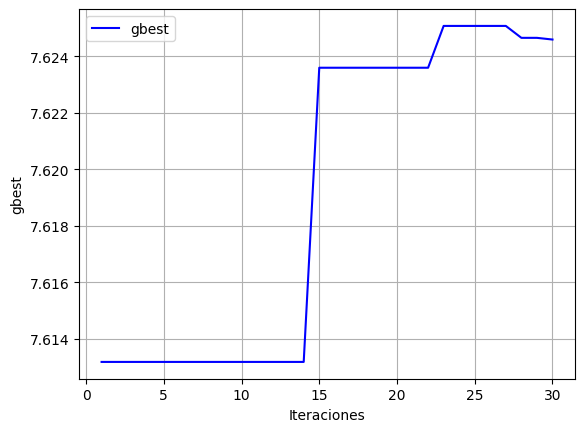

In [1080]:
gbest_list = [7.61317997,7.61317997,7.61317997,7.61317997,7.61317997,7.61317997,7.61317997,7.61317997,7.61317997,
              7.61317997,7.61317997,7.61317997,7.61317997,7.61317997,7.62359433,7.62359433,7.62359433,7.62359433,
              7.62359433,7.62359433,7.62359433,7.62359433,7.62507465,7.62507465,7.62507465,7.62507465,7.62507465,
              7.62465264,7.62465264,7.62459276]

# graficamos gbest
plt.figure()
plt.plot(np.arange(1, 31, 1), gbest_list, label="gbest", color="blue")
plt.xlabel("Iteraciones")
plt.ylabel("gbest")
plt.grid()
plt.legend()
plt.show()